### Описание данных
#### Данные для первой части
Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
#### Данные для второй части
transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Загрузка и предобрботка данных

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

In [35]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Таблица hypothesis

In [36]:
display(hypothesis)
print(hypothesis.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


## Таблица orders

In [37]:
display(orders.head(10))
print(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


In [38]:
print(orders.duplicated().sum())

0


In [39]:
# Изменение типа столбца date с object на datetime
orders["date"] = pd.to_datetime(orders["date"], format='%Y-%m-%d')

In [40]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


## Таблица visitors

In [41]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [42]:
print(visitors.duplicated().sum())

0


In [43]:
# Изменение формата date
visitors["date"] = pd.to_datetime(visitors["date"], format='%Y-%m-%d')

In [44]:
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [45]:
print(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()/len(orders)*100) 

group    4.845447
dtype: float64


In [46]:
check_user_group = orders.groupby(['visitorId']).agg({'group' : 'nunique'})
check_user_group = check_user_group.query('group == 2')
check_user_group.count()

group    58
dtype: int64

Повторяющиеся в двух группах пользователи составляют менее 5%, в абсолютном значении их 58. Это очень малая доля от общего количества пользователей (1197), а потому они не могут значительно исказить результаты проверки, при этом, если удалить всех таких пользователей, возможно, группы станут менее сбалансированными. Соответственно, кажется разумным работать с данными в том виде, в котором они представлены (с учетом дубликатов). 

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [47]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день..."
0,13.3,"Добавить два новых канала привлечения трафика,..."
7,11.2,Добавить форму подписки на все основные страни...
6,8.0,Показать на главной странице баннеры с актуаль...
2,7.0,Добавить блоки рекомендаций товаров на сайт ин...
1,2.0,"Запустить собственную службу доставки, что сок..."
5,1.3,"Добавить страницу отзывов клиентов о магазине,..."
3,1.1,"Изменить структура категорий, что увеличит кон..."
4,1.0,"Изменить цвет фона главной страницы, чтобы уве..."


- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [48]:
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,Добавить форму подписки на все основные страни...,10
2,56.0,Добавить блоки рекомендаций товаров на сайт ин...,8
0,40.0,"Добавить два новых канала привлечения трафика,...",3
6,40.0,Показать на главной странице баннеры с актуаль...,5
8,16.2,"Запустить акцию, дающую скидку на товар в день...",1
3,9.0,"Изменить структура категорий, что увеличит кон...",8
1,4.0,"Запустить собственную службу доставки, что сок...",2
5,4.0,"Добавить страницу отзывов клиентов о магазине,...",3
4,3.0,"Изменить цвет фона главной страницы, чтобы уве...",3


- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Можно заметить, что фреймворки дают разные результаты при применении к датафрейму. Так, различаются самые приоритетные гипотезы (ICE - 8, 0, 7; RICE - 7, 2, 0). Такое различие объясняется тем, что во втором случае мы учитываем параметр пользовательского охвата, что важно при приоритизации гипотез, поэтому для нас приоритетными будут гипотезы 7,2 0. 

# Часть 2. Анализ A/B-теста

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [49]:
date_group = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group']) #отбираем уникальные группы и даты
orders_cumulative = date_group.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
orders_cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
visitors_cumulative = date_group.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
cumulative_data = orders_cumulative.merge(visitors_cumulative, left_on=['date', 'group'], right_on=['date', 'group'])
print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


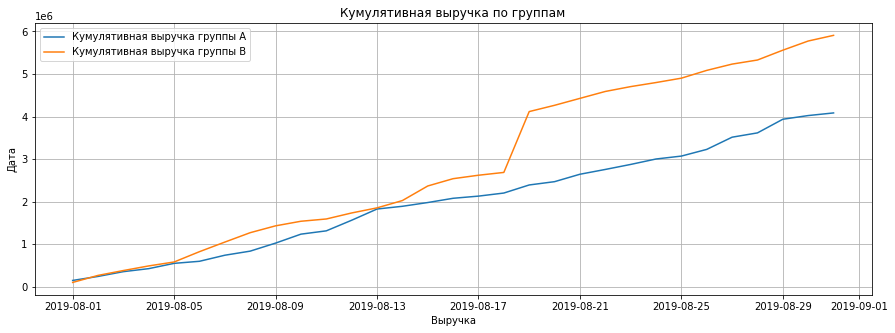

In [50]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Кумулятивная выручка группы A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Кумулятивная выручка группы B')
plt.grid()
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Выручка")
plt.ylabel("Дата")
plt.legend();

Как мы видим, группа B стабильно показывает большую выручку чем группа A. 
Выручка группы B изначально растет быстрее, чем выручка A, при этом примерно 18 августа наблюдается резкий рост выручки B, возможно, связанный с какими-либо сезонными причинами. До этого момента наблюдался относительно синхронный рост выручек обеих групп. 

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

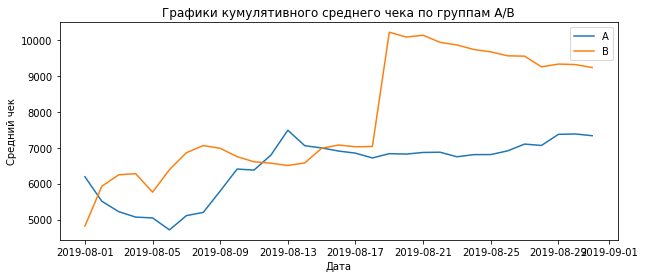

In [51]:
plt.figure(figsize=(10,4))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Данные графика кумулятивного среднего чека коррелируют с данными о выручке по группам. Так, заметно почти полностью стабильное преобладание значений среднего чека по группе B над значениями среднего чека по группе A. В то же время, примерно 13 августа наблюдается резкий рост среднего чека A, но уже ~19 августа резко возрастает средний чек группы B. После этого средний чек B медленно снижается, а средний чек A медленно растет. Как уже было сказано, аномальный рост среднего чека B может быть объяснен сезонным ростом спроса. 

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

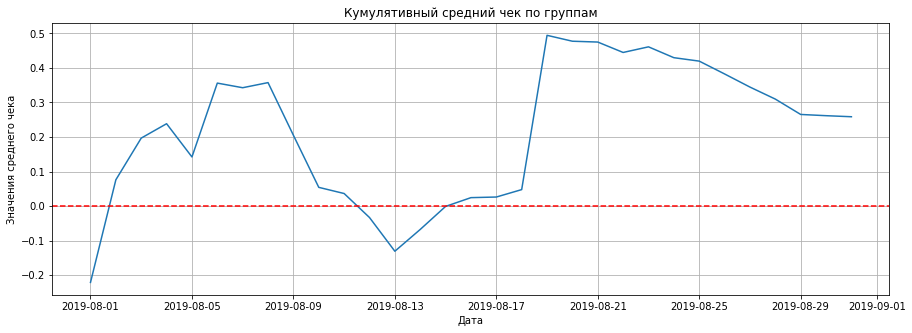

In [69]:
cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulative_revenue['date'], (cumulative_revenue['revenueB']/cumulative_revenue['ordersB'])/ \
         (cumulative_revenue['revenueA']/cumulative_revenue['ordersA'])-1)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel("Дата")
plt.ylabel("Значения среднего чека")
plt.axhline(y=0, color='red', linestyle='--') 
plt.show()

Вновь видим, как чек группы Б превышает чек А с 1 по 13 августа (при этом снижение начинается примерно 8 августа), потом наблюдается резкий рост Б и вновь постепенное снижение, но уже более медленное. 

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения

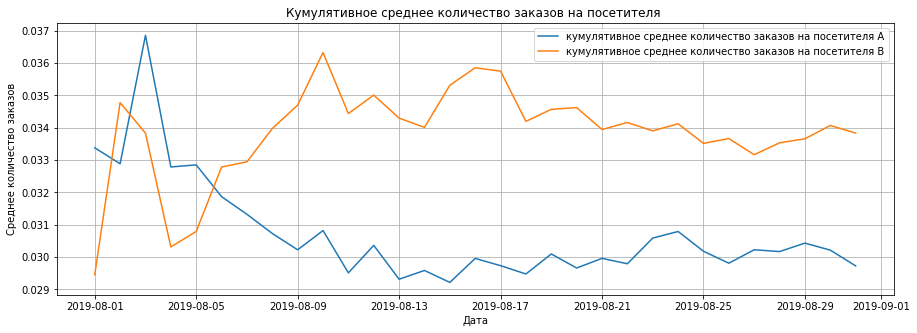

In [71]:
cumulative_data['order_amount'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_amount_A = cumulative_data[cumulative_data['group']=='A']
cumulative_amount_B = cumulative_data[cumulative_data['group']=='B']
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulative_amount_A['date'], cumulative_amount_A['order_amount'], label='кумулятивноe среднеe количество заказов на посетителя A')
plt.plot(cumulative_amount_B['date'], cumulative_amount_B['order_amount'], label='кумулятивноe среднеe количество заказов на посетителя B')
plt.title('Кумулятивноe среднеe количество заказов на посетителя ')
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов")
plt.legend();

Примерно со 2 по 5 августа среднее количество заказов группы А было больше, но после пика (примерно 3 августа) оно начало сильно снижаться, а с 6 августа данный показатель стабильно лидирует для группы Б. Начинается примерно с 9 августа показатель почти неизменен (несмотря на незначительные пики и снижения) для обеих групп. В целом кумулятивное среднее количество заказов стабильно больше у группы Б, нежели у А. 

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

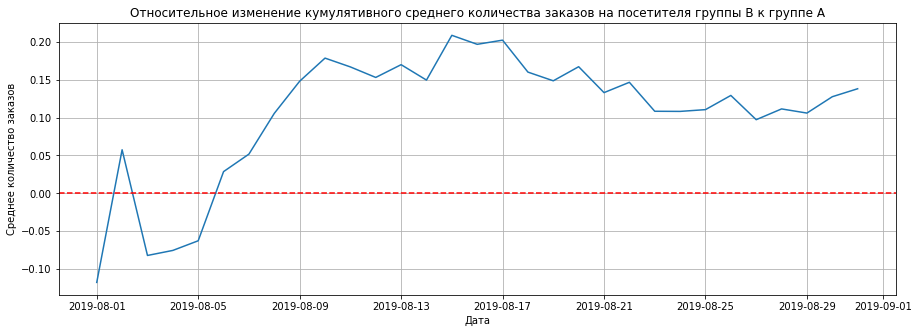

In [72]:
cumulative_amount = cumulative_amount_A[['date','order_amount']].merge(cumulative_amount_B[['date','order_amount']],
                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulative_amount['date'], cumulative_amount['order_amountB']/cumulative_amount['order_amountA']-1, 
         label="Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов")
plt.show()

За исключением 2 августа, с 1 по 5 августа среднее количество заказов в группе А было больше на 5-10%, чем в группе Б. С 6 августа и до конца периода исследуемый показатель был больше у группы Б на 10-20%, при этом примерно с 15 августа, когда был пик значений показателя (на 21% больше, чем в группе А), начинается снижение среднего количества заказов в группе Б. 

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [55]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)


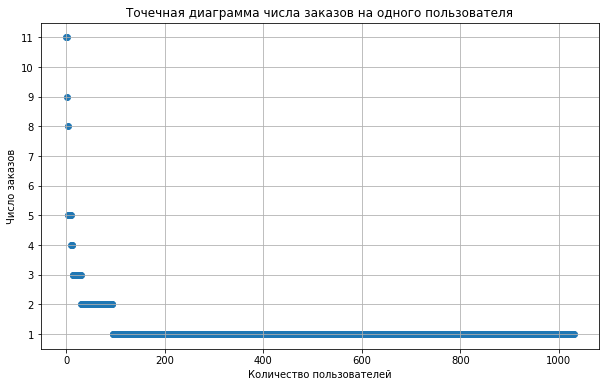

In [73]:
plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(pd.Series(range(0, len(ordersByUsers))), ordersByUsers['transactionId'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel("Количество пользователей")
plt.ylabel("Число заказов")
plt.locator_params (axis='y', nbins= 20 ) 
plt.show()


Большая часть пользователей совершили 1 заказ, поэтому график имеет большой "хвост" в виде единичных значений 

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [57]:
percentiles = np.percentile(ordersByUsers['transactionId'], [95, 99])
print('95-й перцентиль:', percentiles[0])
print('99-й перцентиль:', percentiles[1])

95-й перцентиль: 2.0
99-й перцентиль: 4.0


Можно заметить, что большинство пользователей совершали заказы не более 2 раз (95%), только 1% пользователей соверишили более 4 заказов, поэтому в качестве границы аномальных пользователей выберем показатель, равный 2 заказам

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

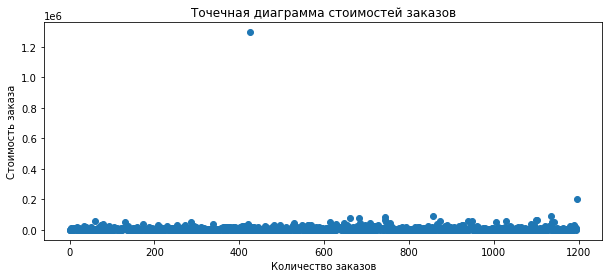

In [74]:
plt.figure(figsize=(10,4))
plt.scatter(pd.Series(range(0, len(orders))), orders['revenue'])
plt.title('Точечная диаграмма стоимостей заказов')
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказа")
plt.show()

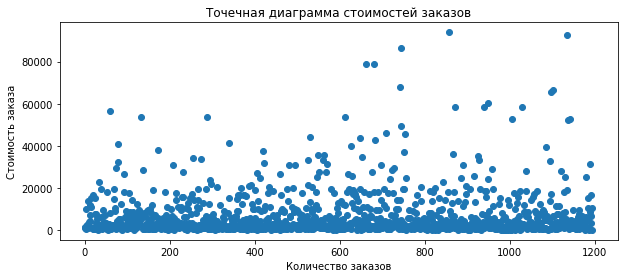

In [75]:
#исключаем аномальные значения
plt.figure(figsize=(10,4))
plt.scatter(pd.Series(range(0, len(orders[orders['revenue']<=195000]['revenue']))), orders[orders['revenue']<=195000]['revenue'])
plt.title('Точечная диаграмма стоимостей заказов')
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказа")
plt.show()


На первой диаграмме видны два очевидных выброса: 1.3 млн. и 200 тыс. После исключения выбросов границы аномалий можно определить с помощью перцентилей. 

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [60]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('95-й перцентиль стоимости:', round(percentiles[0]))
print('99-й перцентиль стоимости:', round(percentiles[1]))

95-й перцентиль стоимости: 28000
99-й перцентиль стоимости: 58233


Заметим, что между 95-м и 99-м перцентилями наблюдается большой размах, такие заказы стоит учесть, а потому в качестве границы установим значение 99-ого перцентиля

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. 

In [61]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Используется тест Манна-Уитни, так как он позволяет оценить нормальность распределения данных при наличии выбросов. 

Нулевая гипотеза: различий в среднем среднем количестве заказов на посетителя между группами нет. 

Альтернативная гипотеза: различия в среднем среднем количестве заказов на посетителя между руппами есть. 

In [62]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("p-value:","{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница между сравниваемыми величинами:","{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.01679
Относительная разница между сравниваемыми величинами: 0.138


В качестве нулевой гипотезы было выдвинуто утверждение, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет. Так как p-value меньше 5%, гипотезу отвергаем, вычисленное различие (в "пользу" группа Б) равно 13.8% и является значительным для рассматриваемых групп

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Для проверки используем критерий Манна-Уитни, так как работаем с неочищенными данными, содержащими аномальные значения. 

In [63]:
print("p-value:",'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительная разница между сравниваемыми величинами:",'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value: 0.729
Относительная разница между сравниваемыми величинами: 0.259


В качестве нулевой гипотезы было выдвинуто утверждение, что статистически значимых различий в среднем чеке заказа между группами нет. P-value значительно больше 5%, следовательно, нулевая гипотеза не отвергается. Этот результат подтверждается вычисленной разницей в среднем чеке, которая примерно на 26% больше для группы Б. 

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Ранее мы определили показатели аномальных пользователей с помощью перцентилей по количеству заказов и выручке. Так, "аномальными" считаются пользователи, совершившие более 2 заказов или совершившие заказ более, чем на 58233.2 руб. 

In [64]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64


Узнаем, как фильтрация пользователей повлияла на общее количество данных - подсчитаем сначала абсолютные потери:

In [65]:
print(abnormalUsers.shape[0]) 

31


In [66]:
print(abnormalUsers.shape[0]/len(orders)) 

0.025898078529657476


Всего 31 аномальных пользователя, это достаточно незначительная часть от общего количества наблюдений (менее 3%), поэтому, предположительно, относительные результаты (тестов) также не покажут сильных изменений

In [67]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("p-value:",'{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель:",'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01007
Относительный показатель: 0.174


P-value после очистки данных все еще меньше 5%, а значит, различия в среднем количестве заказов на посетителя между группами есть (нулевая гипотеза: различий нет). После удаления аномальных значений также увеличилось относительное различие в среднем значении (17,4%)

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [77]:

print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный показатель:",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.798
Относительный показатель: -0.020


Как и в случае с неочищенными данными, нулевую гипотезу отвергать не стоит. При этом средний чек группы Б оказался меньше среднего чека группы А (на 2%), что можно объяснить удалением аномальных значений

14. Выводы:
Во всех экспериментах был получен результат, говорящий о том. что различия в среднем количестве заказов на посетителя между группами есть. Показатель относительно больше для группы Б: по неочищенным данным - на 13,8%, по очищенным от аномальных значений данным - на 17,4%.
Также эксперименты на "сырых" и очищенных данных показали, что значимые различия различия в средних чеках групп A и Б отстутствуют. В то же время в эксперименте с неочищенными данными средний чек группы Б был значительно больше среднего чека группы А (на 26%) за счет больших аномальных значений, после очистки данных средний чек группы А стал превосходить средний чек Б на 2%
Таким образом, можно констатировать победу группы Б, так как, хотя группа А незначительно (2%) превосходит группу Б в среднем чеке, по показателю среднего количества заказов относительный "выигрыш" группы Б достаточно весом (17,4%)